In [3]:
from data import WhitenedDataset, PinkNoise3Dataset
import torch
from torch.utils.data import DataLoader
from utils import accumulate_frames, implay
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

torch.Size([1, 96, 32, 32])


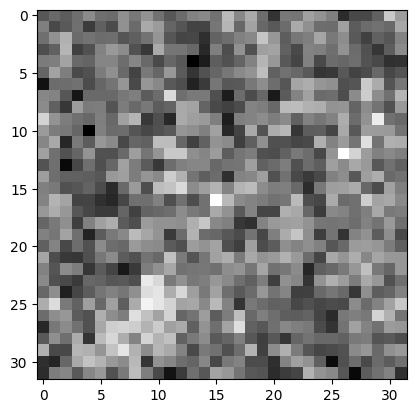

In [8]:
dataset = PinkNoise3Dataset(n_spatial=32, n_temporal=96, fs=1000)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

data = next(iter(dataloader))
print(data.shape)

implay(data[0].numpy().transpose(1, 2, 0))


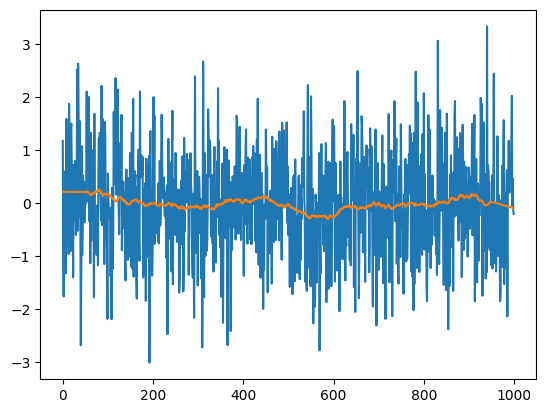

In [2]:
x = np.random.randn(1000)
y = savgol_filter(x, 101, 1)
plt.figure()
plt.plot(x)
plt.plot(y)
plt.show()

In [3]:
# Test the dataset
dataset = WhitenedDataset(
  sampling_frequency=1000.,
  pixels_per_degree=360.,
  roi_size=32,
  fixation_samples=256,
  diffusion_constant=40.0 / 3600.0,
)

dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

input, target, target_idx, gaze_pos, gaze_pos_smoothed = next(iter(dataloader))

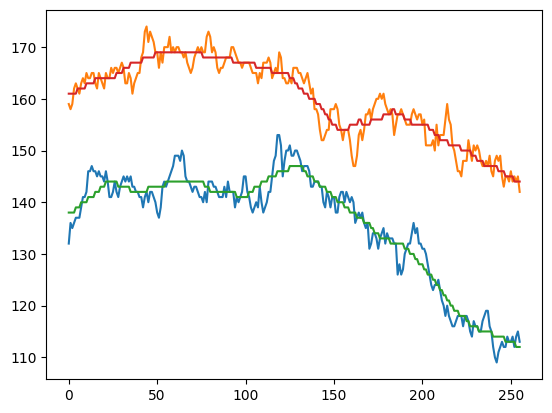

In [4]:
plt.figure()
plt.plot(gaze_pos[0].T)
plt.plot(gaze_pos_smoothed[0].T)

In [91]:
recons = torch.stack(
  [
    accumulate_frames(frames, pos - pos[:, idx][:, None])
    for frames, pos, idx in zip(
        input,
        gaze_pos[:, :, :],
        target_idx,
    )
  ]
)

In [2]:
batch = np.random.randint(input.shape[0])

plt.figure()
plt.plot(gaze_pos[batch,0])
plt.plot(gaze_pos[batch,1])

show_n = 5
fig, axs = plt.subplots(1, show_n)
for i, frame in enumerate(input[batch,target_idx[batch]:target_idx[batch]+show_n]):
  axs[i].imshow(frame)
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(recons[batch])
axs[1].imshow(target[batch])

NameError: name 'np' is not defined

In [70]:
target.shape

torch.Size([8, 32, 32])